In [2]:
! pip install quandl

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import quandl as qu
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

In [6]:
da=qu.get("nse/tataglobal")
da.head(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98
2010-07-28,118.0,120.50,117.20,118.15,118.25,835593.0,994.01
2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134.0,2791.03
2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191.0,3112.68
2010-08-02,117.3,118.50,116.60,118.10,117.30,663593.0,779.85


In [7]:
da.tail()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09
2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05


In [8]:
da.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2100 entries, 2010-07-21 to 2019-01-04
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  2100 non-null   float64
 1   High                  2100 non-null   float64
 2   Low                   2100 non-null   float64
 3   Last                  2100 non-null   float64
 4   Close                 2100 non-null   float64
 5   Total Trade Quantity  2100 non-null   float64
 6   Turnover (Lacs)       2100 non-null   float64
dtypes: float64(7)
memory usage: 131.2 KB


In [9]:
da.isnull().sum()

Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

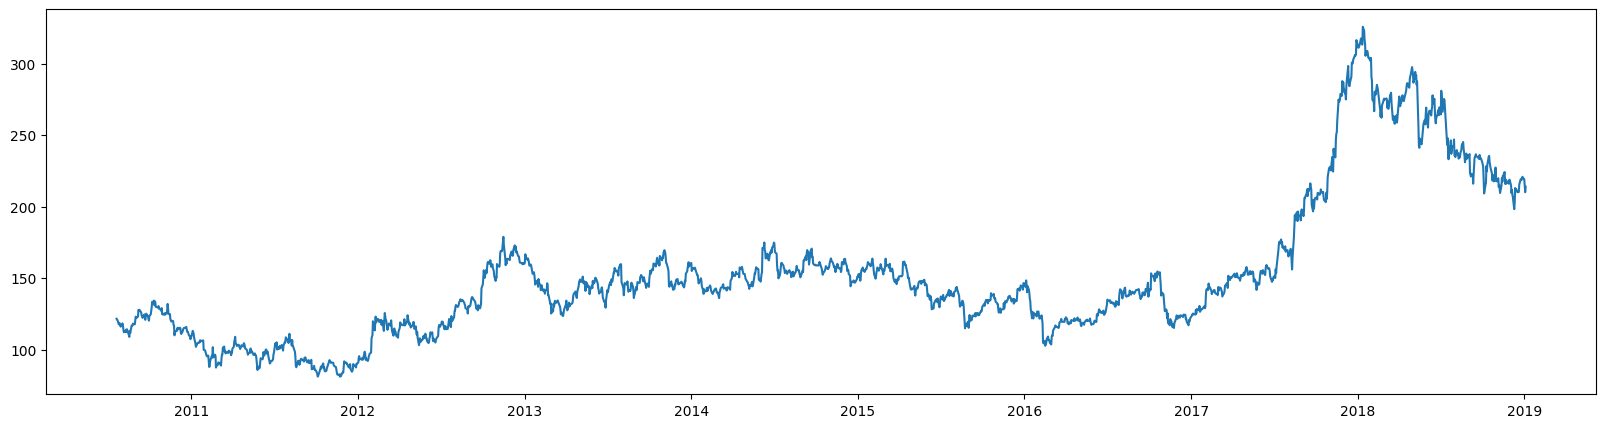

In [10]:
plt.figure(figsize=(20,5))
plt.plot(da["Close"],label="closing price")

In [11]:
da.columns

Index(['Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

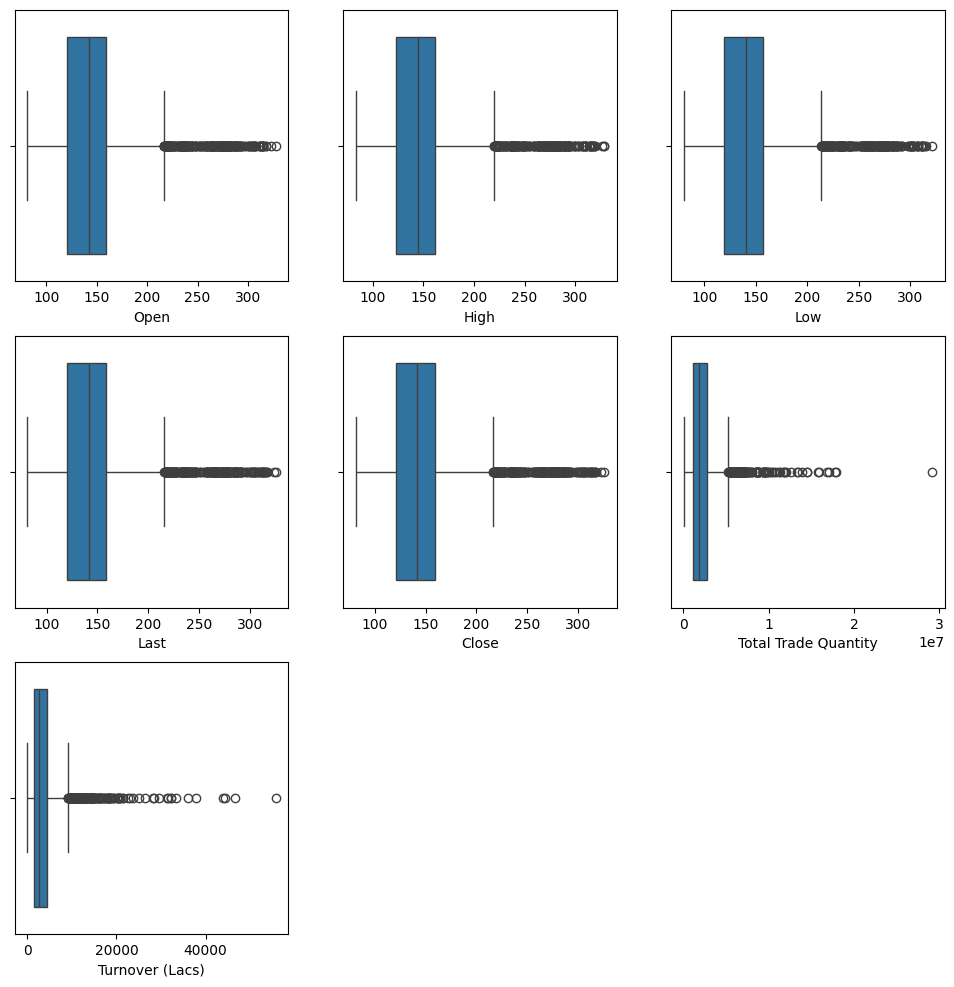

In [12]:
plt.figure(figsize=(12,12))
for i,col in enumerate(['Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)']):
  plt.subplot(3,3,i+1)
  sns.boxplot(x=col,data=da)

plt.show()

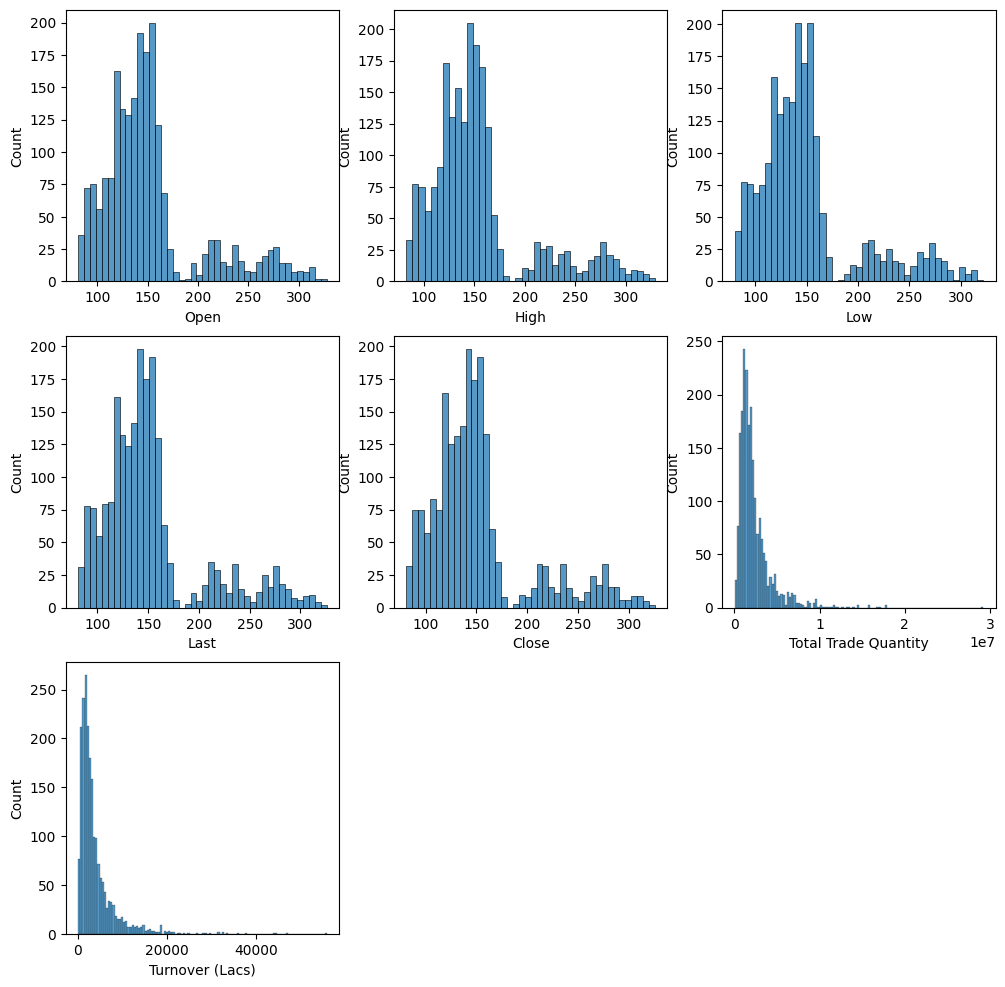

In [13]:
plt.figure(figsize=(12,12))
for i,col in enumerate(['Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)']):
  plt.subplot(3,3,i+1)
  sns.histplot(x=col,data=da)

plt.show()

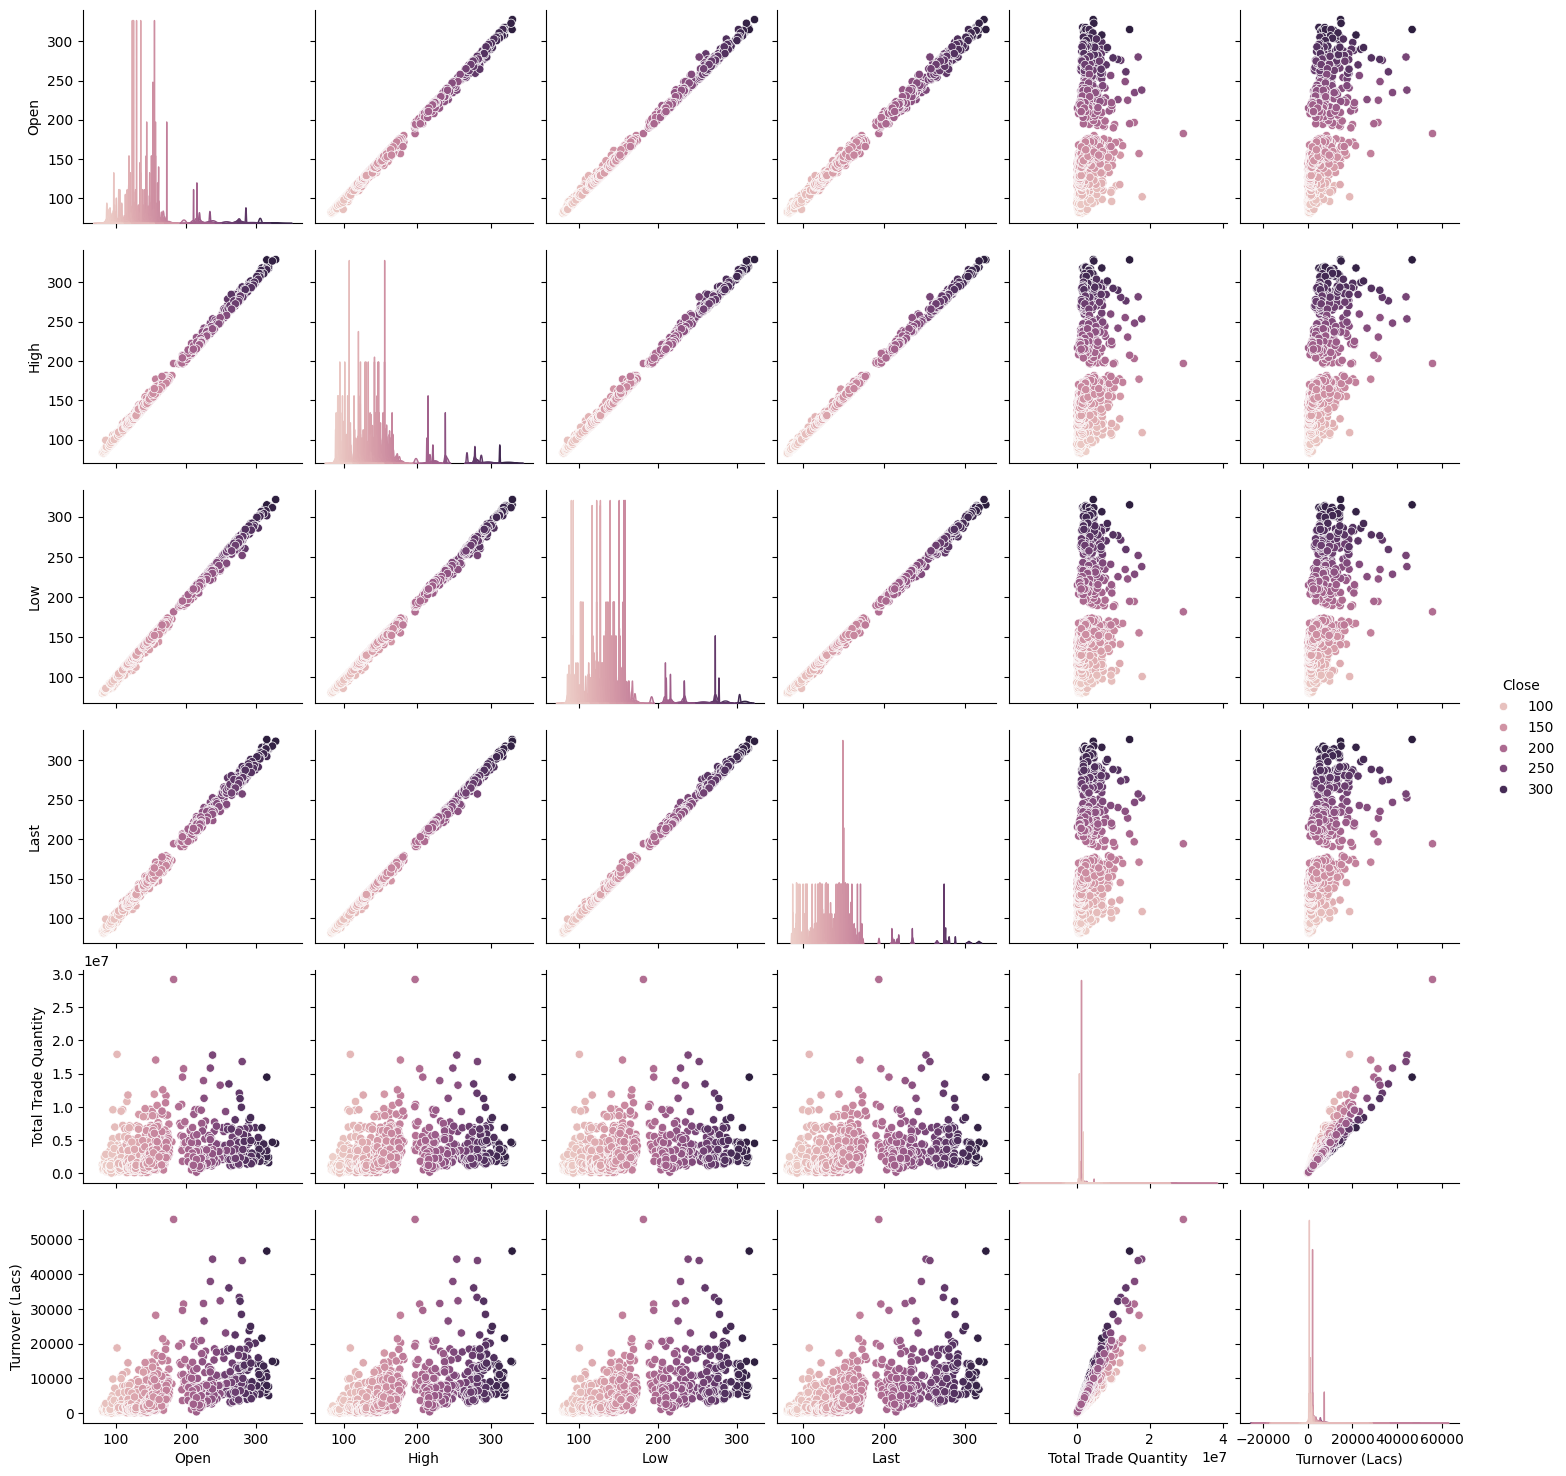

In [14]:
sns.pairplot(da,hue="Close")

#Classification problem : buy (+1) or sell (-1) the stock #

In [15]:
da["Open - Close"] =da["Open"]-da["Close"]
da['High - Low'] =da["High"]-da["Low"]

In [16]:
x=da[["Open - Close",'High - Low']]
x.head(10)

,Open - Close,High - Low
Date,,
2010-07-21,0.55,1.95
2010-07-22,-0.60,1.75
2010-07-23,1.15,1.70
2010-07-26,2.50,3.90
2010-07-27,-1.05,7.50
2010-07-28,-0.25,3.30
2010-07-29,-4.10,9.20
2010-07-30,0.45,3.40
2010-08-02,0.00,1.90


**Intention is store +1 for the buy signal and -1 for the sell
signal the target varabiel is "y" for classification task**

In [20]:
y=np.where(da["Close"].shift(-1)>da["Close"],1,-1)

In [24]:
x_train,x_test,y_train,y_test=train_test_split (x,y,test_size=0.2,random_state=42)

##KNeighborsClassifier##

In [27]:
params={"n_neighbors":[2,3,200,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,100,101,102,103,105]}
knn_cl=KNeighborsClassifier()
model=GridSearchCV(knn_cl,params,cv=5)
model.fit(x_train,y_train)
accuracy_train=accuracy_score(y_train,model.predict(x_train))
accuracy_test=accuracy_score(y_test,model.predict(x_test))
print("accuracy_train :", accuracy_train)
print("accuracy_test :" , accuracy_test)

accuracy_train : 0.6196428571428572
accuracy_test : 0.49047619047619045


In [29]:
predication_classification = model.predict(x_test)
actual_predict_data=pd.DataFrame({"Actual calss" :y_test,"predicted_class":predication_classification })

In [30]:
actual_predict_data.head(10)

,Actual calss,predicted_class
0,1,-1
1,1,-1
2,-1,-1
3,1,1
4,1,1
5,-1,1
6,-1,-1
7,1,-1
8,1,-1
9,1,1


In [36]:
y_re=da["Close"]

In [38]:
y

array([-1, -1, -1, ..., -1,  1, -1])

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Assuming x, y_re are defined earlier in your code

# Split the data into training and testing sets
x_train_Re, x_test_Re, y_train_Re, y_test_Re = train_test_split(x, y_re, test_size=0.2, random_state=44)

# Define the parameter grid
params = {"n_neighbors": [2, 3, 200, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 100, 101, 102, 103, 105]}

# Instantiate KNeighborsRegressor
knn_re = KNeighborsRegressor()

# Create the GridSearchCV model
model_Re = GridSearchCV(knn_re, params, cv=5)

# Fit the model to the training data
model_Re.fit(x_train_Re, y_train_Re)

# Get the predicted values on the test set
accuracy_test_re = model_Re.predict(x_test_Re)
print("accuracy_test_re:", accuracy_test_re)


accuracy_test_re: [112.45       141.02894737 136.96052632 153.23947368 177.95789474
 132.43421053 147.42105263 137.61578947 118.55526316 139.96315789
 154.34736842 139.60263158 150.29736842 212.92105263 136.83684211
 197.90263158 116.47368421 134.63684211 138.34473684 147.45263158
 153.78157895 132.89736842 121.09736842 132.43421053 165.44473684
 219.53947368 133.31315789 132.06842105 158.03947368 128.29736842
 145.64736842 134.67368421 154.71315789 134.78421053 200.72894737
 120.72894737 152.04210526 154.31052632 141.58421053 136.25789474
 126.51842105 129.10526316 132.68947368 156.78157895 158.74473684
 164.21315789 195.53421053 179.73684211 180.35789474 124.98421053
 134.65       135.90789474 132.82105263 172.78684211 150.41052632
 126.98421053 135.54210526 143.97368421 117.63421053 135.05
 140.01052632 121.11315789 210.37368421 120.12105263 136.75789474
 137.90789474 117.63947368 135.41578947 180.05526316 129.04736842
 138.66052632 226.22631579 171.44473684 155.85263158 130.4473684

In [51]:
vaild=pd.DataFrame({"Actual calss" :y_test_Re,"predicted_class_value":accuracy_test_re })

In [52]:
vaild.head(10)

,Actual calss,predicted_class_value
Date,,
2015-03-17,156.70,112.450000
2015-09-07,120.45,141.028947
2013-02-18,141.90,136.960526
2013-07-05,145.15,153.239474
2018-03-15,279.60,177.957895
2017-01-19,130.50,132.434211
2013-11-26,145.50,147.421053
2012-12-17,165.65,137.615789
2016-07-11,133.10,118.555263
